In [68]:
import psycopg2
import pyodbc
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dw_con=psycopg2.connect(host=os.environ['DWHOST'], port='5439',
                     dbname='datawarehouse', user=os.environ['DWUSERID'], password=os.environ['DWPWD'])

In [7]:
us_data = pd.read_sql_query('''
SELECT DATE,
       SUM(CASE WHEN engagements < 200 THEN engagements ELSE 0 END) AS sub_200_engagements,
       SUM(CASE WHEN engagements >= 200 THEN engagements ELSE 0 END) AS over_200_engagements,
       SUM(engagements) AS total_engagements
FROM(
            SELECT student_id
                   ,engagement_date::DATE AS DATE
                   ,COUNT(1) AS engagements
            FROM reporting.engagements
            WHERE region_id = '76F07F34-7C78-4B47-ACB0-27A5B10A9F08'
              AND engagement_Date::DATE >= '2020-02-01'
              and engagement_date::Date != current_date
            GROUP BY student_Id
                   ,engagement_date::DATE
)
GROUP BY date
'''
                           ,dw_con)

In [29]:
us_data = us_data.sort_values(by='date').set_index('date')

In [51]:
us_data.head()

,sub_200_engagements,over_200_engagements,total_engagements
date,,,
2020-02-01,27371,226,27597
2020-02-02,31652,233,31885
2020-02-03,30603,229,30832
2020-02-04,30899,240,31139
2020-02-05,29706,232,29938


In [53]:
us_data = us_data.reset_index()

In [54]:
us_data.head()

,date,sub_200_engagements,over_200_engagements,total_engagements
0,2020-02-01,27371,226,27597
1,2020-02-02,31652,233,31885
2,2020-02-03,30603,229,30832
3,2020-02-04,30899,240,31139
4,2020-02-05,29706,232,29938


In [55]:
us_data['date'] = pd.to_datetime(us_data['date'])

In [56]:
us_data.head()

,date,sub_200_engagements,over_200_engagements,total_engagements
0,2020-02-01,27371,226,27597
1,2020-02-02,31652,233,31885
2,2020-02-03,30603,229,30832
3,2020-02-04,30899,240,31139
4,2020-02-05,29706,232,29938


In [58]:
us_data = us_data.sort_values(by='date').set_index('date')

In [59]:
us_data.head()

,sub_200_engagements,over_200_engagements,total_engagements
date,,,
2020-02-01,27371,226,27597
2020-02-02,31652,233,31885
2020-02-03,30603,229,30832
2020-02-04,30899,240,31139
2020-02-05,29706,232,29938


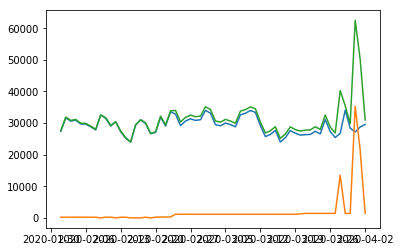

In [60]:
plt.plot(us_data)

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

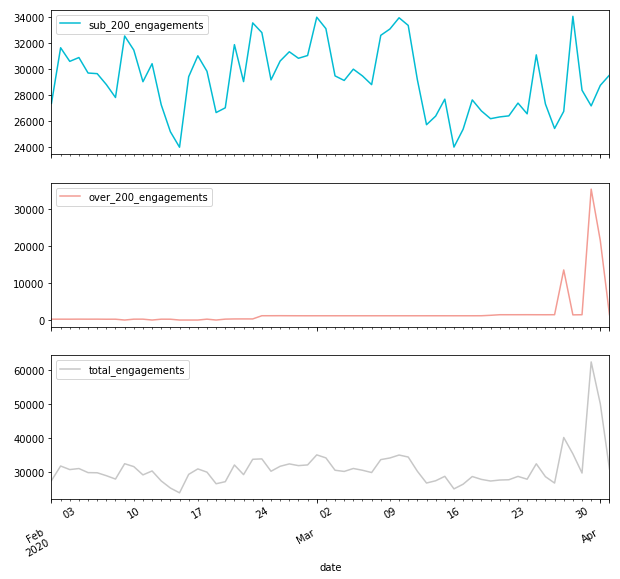

In [69]:
chart = us_data.plot.line(color = [(2/255,188/255,211/255),(243/255,156/255,148/255),(0.78,0.78,0.78)], subplots = True,
                     figsize = (10,10))